In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [11]:
import numpy as np
import pandas as pd

In [12]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect 


In [14]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine) 

In [19]:
#Inspect Database 
# Get a list of column names and types
inspector = inspect(engine) 
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns 

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [20]:
inspector = inspect(engine) 
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

            precipitation
date                     
2016-08-23           0.00
2016-08-23           0.15
2016-08-23           0.05
2016-08-23            NaN
2016-08-23           0.02
2016-08-23           1.79
2016-08-23           0.70
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.22
2016-08-24           2.15
2016-08-24           1.45
2016-08-25           0.08
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.11
2016-08-26           0.00
2016-08-26           0.03
2016-08-26           0.02
2016-08-26           0.04
2016-08-26           0.00
2016-08-26           0.01
2016-08-27           0.00
2016-08-27           0.18
2016-08-27           0.02
...                   ...
2017-08-16           0.00
2017-08-16           0.07
2017-08-16           0.12
2017-08-16           0.42
2017-08-17           0.00
2017-08-17  

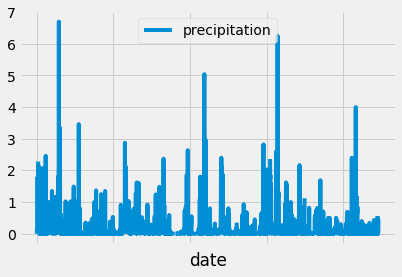

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#Query All
precipitation = session.query(Measurement.date, Measurement.prcp). all()
print(precipitation) 
#Most recent date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Calculate the date 1 year ago from the last data point in the database
precipitation_12 = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()
precipitation_12
# Save the query results as a Pandas DataFrame and set the index to the date column
p_df = pd.DataFrame(precipitation_12, columns=['date', 'precipitation']) 
p_df.set_index('date', inplace=True)  
# Sort the dataframe by date
p_df.sort_values('date') 
print (p_df) 
# Use Pandas Plotting with Matplotlib to plot the data
p_df.plot()  

![precipitation](Images/precipitation.png)

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
p_df.describe() 

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [23]:
# Design a query to show how many stations are available in this dataset?
station = session.query(func.count(Station.station)) .all() 
station

[(9)]

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order
active_stations = session.query(Measurement.station, func.count(Measurement.prcp)). \
                    group_by(Measurement.station). \
                    order_by(func.count(Measurement.prcp).desc()).all()
print(active_stations) 

               
              

[('USC00519281', 2772), ('USC00513117', 2696), ('USC00519397', 2685), ('USC00519523', 2572), ('USC00516128', 2484), ('USC00514830', 1937), ('USC00511918', 1932), ('USC00517948', 683), ('USC00518838', 342)]


In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded
station_ltemp= session.query(func.min(Measurement.tobs)).all() 
station_ltemp 


[(53.0)]

In [26]:
# Highest temperature recorded,
station_htemp= session.query(func.max(Measurement.tobs)).all()
station_htemp 

[(87.0)]

In [27]:
 #average temperature most active station?
station_avgtemp= session.query(func.avg(Measurement.tobs)).all()
station_avgtemp 

[(73.09795396419437)]

In [28]:
# Choose the station with the highest number of temperature observations.
# Observations 2772, Station 'USC00519281'
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_12obs = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').all() 



In [29]:
#Creating df for histogram
df = pd.DataFrame(station_12obs, columns=['Station', 'tabs'])
df.head() 

,Station,tabs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


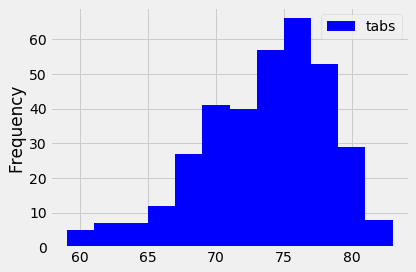

In [30]:
#Histogram 
df.plot.hist(bins=12, color='#0000FF')
plt.tight_layout() 
plt.show() 



![precipitation](Images/station-histogram.png)

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = "2017-07-18"
end_date = "2017-07-27"


def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


In [33]:
#Create df
my_trip = (calc_temps('2017-07-18', '2017-07-27'))  

In [34]:
my_trip


[(72.0, 78.44615384615385, 84.0)]

In [35]:
df = pd.DataFrame(my_trip, columns=['tmin','tavg','tmax'])
df

,tmin,tavg,tmax
0,72.0,78.446154,84.0


Text(0.5, 1.0, 'Trip Avg Temp')

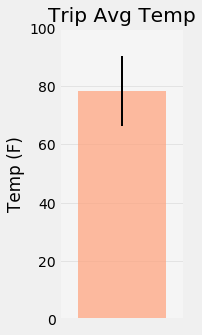

In [36]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(2,5)) 
plt.bar(0, df['tavg'], color="lightsalmon", width=1.4, 
        alpha=0.7, yerr=df['tmax']-df['tmin'], error_kw={"linewidth":2})
plt.gca().set_facecolor("whitesmoke")
plt.grid(linestyle='-', linewidth='0.5', color='lightgrey')
plt.gca().set_axisbelow(True)
plt.gca().set_xticks([]) 
plt.xlim((-1, 1))
plt.ylim((0, 100))
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")



In [37]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date_dt = dt.datetime.strptime(start_date, '%Y-%m-%d')
end_date_dt = dt.datetime.strptime(end_date, '%Y-%m-%d')

session.query(Measurement.station, func.avg(Measurement.prcp)). \
            filter(Measurement.date.between(start_date_dt, end_date_dt)). \
            group_by(Measurement.station). \
            order_by(func.avg(Measurement.prcp).desc()).all()


[('USC00516128', 0.8122222222222222),
 ('USC00514830', 0.17888888888888888),
 ('USC00519281', 0.15444444444444444),
 ('USC00513117', 0.10222222222222221),
 ('USC00519523', 0.054285714285714284),
 ('USC00519397', 0.01375),
 ('USC00517948', 0.0)]

## Optional Challenge Assignment

In [38]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [39]:
#design a Flask API based on the queries that you have just developed.
#Use FLASK to create your routes.

In [40]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [41]:
# Plot the daily normals as an area plot with `stacked=False`
